## 1. Импорт библиотек

In [101]:
import pandas as pd
import numpy as np
from random import uniform
import matplotlib.pyplot as plt
import os
from math import sqrt

## 2. Лаба 1

### Функция имитационной модели

In [21]:
def Ita(Teta : np.array, x: np.array) -> float:
    """
    Имитационная модель. Линейная по параметрам тета.\n
    param Teta - (np.array) - весовые переменные (вклад входной переменной)\n
    param x - (np.array) - входной вектор\n
    return: (float)
    """
    if x.shape[0] != 3 or Teta.shape[0] != 5:
        raise ValueError("Размер не соответствует условию")
    return Teta[0]*x[0] + Teta[1]*x[1] + Teta[2]*x[2] + Teta[3]*x[0]*x[1] + Teta[4]*x[0]*x[2]

### Вычисление значение отклика

In [22]:
def y_response(x : np.array, Teta : np.array, eta : float) -> float:
    """
    Функция отклика\n
    param x - (np.array) - входной вектор\n
    param Teta - (np.array) - весовые переменные (вклад входной переменной)\n
    param eta - (float) - Ошибка наблюдения
    """
    if x.shape[0] != 3 or Teta.shape[0] != 5:
        raise ValueError("Размер не соответствует условию")
    return Ita(Teta, x) + eta

### Генератор x

In [25]:
def generator_x(x_min : float = 0, x_max : float = 1, len_x : int = 3) -> np.array:
    """
    Генератор вектора x по равномерному закону заданной длины\n
    param x_min : (float) - минимальное значение\n
    param x_max : (float) - максимальное значение\n
    param len_x : (int) - длина вектора
    return: (np.array)
    """
    
    if x_min > x_max:
        raise ValueError("x_min > x_max")
    return np.array([uniform(x_min, x_max) for i in range(len_x)])    

In [35]:
def generator_sample_x(x_min : float = 0, x_max : float = 1, len_x : int = 3) -> np.array:
    """
    Сгенерировать значения равномерно по отрезку
    param x_min : (float) - минимальное значение\n
    param x_max : (float) - максимальное значение\n
    param len_x : (int) - длина вектора
    return: (np.array)
    """
    return np.arange(x_min, x_max+1e-7, (x_max - x_min)/(len_x - 1))


### Генератор ошибки

In [102]:
def generator_deviation(eta : float, len_list : int) -> np.array:
    if len_list < 0:
        raise ValueError("Длина не может быть отрицательной")
    if len_list == 0:
        return np.array([])
    return np.random.normal(0, sqrt(eta), len_list)

In [37]:
x1 = generator_sample_x(-1, 1, 3)
x1


array([-1.,  0.,  1.])

### Графики функции

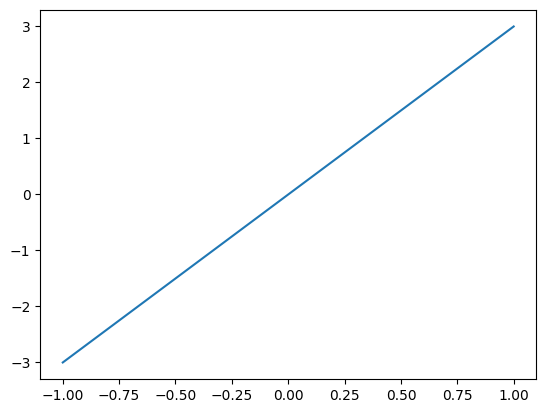

In [40]:
x = np.linspace(-1, 1)
y = [Ita(np.array([1, 2, 3, 20, 30]), np.array([0, 0, x3])) for x3 in x]
plt.plot(x, y)
plt.show()

### Генератор x

In [ ]:
def generator_x(x_min : float = 0, x_max : float = 1, len_x : int = 3) -> np.array:
    """
    Генератор вектора x по равномерному закону заданной длины\n
    param x_min : (float) - минимальное значение\n
    param x_max : (float) - максимальное значение\n
    param len_x : (int) - длина вектора
    return: (np.array)
    """
    
    if x_min > x_max:
        raise ValueError("x_min > x_max")
    return np.array([uniform(x_min, x_max) for i in range(len_x)])

In [33]:
def generator_sample_x(x_min : float = 0, x_max : float = 1, len_x : int = 3) -> np.array:
    """
    Сгенерировать значения равномерно по отрезку
    param x_min : (float) - минимальное значение\n
    param x_max : (float) - максимальное значение\n
    param len_x : (int) - длина вектора
    return: (np.array)
    """
    return np.arange(x_min, x_max, (x_max - x_min)/(len_x - 1))


In [34]:
x1 = generator_sample_x(-1, 1, 3)
x1


array([-1.,  0.])

### Генератор x

In [ ]:
def generator_x(x_min : float = 0, x_max : float = 1, len_x : int = 3) -> np.array:
    """
    Генератор вектора x по равномерному закону заданной длины\n
    param x_min : (float) - минимальное значение\n
    param x_max : (float) - максимальное значение\n
    param len_x : (int) - длина вектора
    return: (np.array)
    """
    
    if x_min > x_max:
        raise ValueError("x_min > x_max")
    return np.array([uniform(x_min, x_max) for i in range(len_x)])

### Вычисление дисперсии

In [55]:
def Calc_eta(list_u : np.array, procent : float) -> float:
    if procent <= 0 and procent > 1:
        raise ValueError("Процент находится в диапозоне от 0 до 1")
    mean_u = np.ones(list_u.shape[0]) * list_u.mean()
    temp = list_u - mean_u
    w = temp.T @ temp / (list_u.shape[0] - 1)
    return procent* w

### Генерация тестов

In [42]:
def gen_test() -> list:
    x1 = generator_sample_x(-1, 1, 3)
    x2 = generator_sample_x(-1, 1, 3)
    x3 = generator_sample_x(-1, 1, 3)
    result = []
    for x in x1:
        for y in x2:
            for z in x3:
                result.append(np.array([x, y, z]))
    return result

###  Получаем значения имитационной модели

In [58]:
x_test = gen_test()
list_u = np.array([Ita(np.array([1, 2, 3, 20, 30]), x) for x in x_test])
eta = Calc_eta(list_u, 0.12)

### Генерируем значения ошибки 

In [59]:
list_deviation = generator_deviation(eta, len(list_u))


In [103]:
list_deviation_1 = generator_deviation(eta, len(list_u))

### Получаем отклик

In [104]:
y_test = np.array([y_response(x_test[i], np.array([1, 2, 3, 20, 30]), list_deviation_1[i]) for i in range(len(x_test))])

### Создание таблицы

In [110]:
df = pd.DataFrame(columns=np.array(["x1", "x2", "x3", "u", "eta", "y"]))

for i in range(len(x_test)):
    df.loc[len(df)] = np.array([x_test[i][0], x_test[i][1], x_test[i][2], list_u[i], list_deviation_1[i], y_test[i]])

with pd.ExcelWriter(os.path.abspath(".\Results.xlsx")) as writter:
    df.to_excel(writter, sheet_name="Results", float_format="%.2f", index=False)
df

,x1,x2,x3,u,eta,y
0,-1.0,-1.0,-1.0,44.0,5.626853,49.626853
1,-1.0,-1.0,0.0,17.0,-13.404959,3.595041
2,-1.0,-1.0,1.0,-10.0,1.505348,-8.494652
3,-1.0,0.0,-1.0,26.0,-1.133659,24.866341
4,-1.0,0.0,0.0,-1.0,13.999932,12.999932
5,-1.0,0.0,1.0,-28.0,-11.739865,-39.739865
6,-1.0,1.0,-1.0,8.0,3.723675,11.723675
7,-1.0,1.0,0.0,-19.0,12.170628,-6.829372
8,-1.0,1.0,1.0,-46.0,-8.845418,-54.845418
9,0.0,-1.0,-1.0,-5.0,-4.818355,-9.818355


# Лаба 2
### Получение матрицы X

In [73]:
def calc_matrix_X(list_x : list) -> np.matrix:
    return np.matrix([[x[0], x[1], x[2], x[0]*x[1], x[0]*x[2]] for x in list_x])

X = calc_matrix_X(x_test)

### Вычисление тэта с крышечкой

In [106]:
teta_calc = (np.linalg.inv(X.T @ X) @ X.T) @ y_test
teta_calc = np.asarray(teta_calc)[0]
teta_calc

array([ 0.23909926,  4.9661133 , -0.12834444, 22.88767552, 30.11767012])

### Вычисление вектора остатков

In [119]:
I = np.eye(len(x_test))
y_calc = X @ teta_calc
y_calc = np.asarray(y_calc)[0]
e_calc = y_test - y_calc
e_calc = np.asarray(e_calc)
e_calc

array([ 1.69837535e+00, -1.40874220e+01,  4.06889941e+00, -5.14057394e+00,
        1.32390311e+01, -9.25475096e+00, -3.61678393e-01,  1.13312895e+01,
       -6.43874156e+00, -4.98058584e+00,  1.07536284e+01,  1.07659581e+01,
        3.20835118e-01, -1.19401034e+01, -5.37009852e+00, -9.21063538e+00,
        3.67241594e+00, -3.62481344e+00, -1.72226755e-02, -4.27599461e+00,
        9.62239085e+00,  2.63296541e+00, -2.34451624e+01, -7.64273834e+00,
        8.83322613e+00,  7.69836398e+00,  1.64860022e+00])

### Считаем дисперсию

In [123]:
eta_calc = e_calc.T @ e_calc / (27 - 5)
eta_calc

np.float64(94.56610727240522)

In [124]:
eta_calc/eta

np.float64(1.292538685487917)

### Построение таблицы

In [122]:
df2 = pd.DataFrame(columns=np.array(["y", "y^", "y-y^"]))


for i in range(len(y_test)):
    df2.loc[len(df2)] = np.array([y_test[i], y_calc[i], e_calc[i]])

with pd.ExcelWriter(os.path.abspath(".\Result_2.xlsx")) as writter:
    df2.to_excel(writter, sheet_name="Result2", index=False, float_format="%.2f")